# Cross-Validation


## Motivación y repaso

- Una sola división **train/test** puede dar resultados poco confiables.  
- El desempeño del modelo puede depender demasiado de cómo dividimos los datos.  
- **Cross-validation** nos ayuda a obtener una estimación más robusta del rendimiento real del modelo.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Dataset de ejemplo
X, y = load_iris(return_X_y=True)

# División simple. Cambiemos el random_state para ver diferentes resultados (41)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy con train/test split:", accuracy_score(y_test, y_pred))


## K-Fold Cross Validation

- Divide el dataset en **K** subconjuntos (folds).  
- Entrena el modelo **K veces**, cada vez usando un fold distinto como validación.  
- El resultado final es el promedio de todas las evaluaciones.  


In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Cambiemos el random_state para ver diferentes resultados. Subamos n_splits para ver que pasa
kf = KFold(n_splits=5, shuffle=True, random_state=45)
scores = cross_val_score(model, X, y, cv=kf)

print("Accuracy con 5-Fold CV:", scores)
print("Promedio:", scores.mean())



## Selección de Hiperparámetros con Cross-Validation

Podemos usar **GridSearchCV** o **RandomizedSearchCV** para buscar los mejores hiperparámetros de un modelo, usando validación cruzada como método de evaluación.


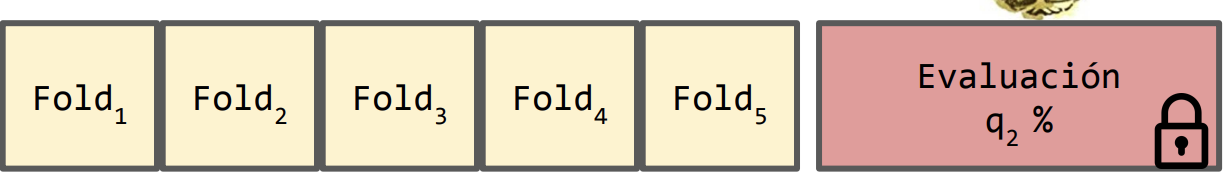

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


rf = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

In [ ]:
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor accuracy promedio (CV):", grid_search.best_score_)

### Pregunta: ¿Cuántas veces entrena el modelo en un GridSearchCV con 5 folds y 10 combinaciones de hiperparámetros?

## Consigna:
- Importar el dataset de arn.
- Dividir en train/test.
- Probar cambiar el random_state a ver si cambia mucho el accuracy.
- Hacer cross-validation con KFold. Jugar con la cantidad de folds y con el random_state.
- Hacer GridSearchCV para encontrar los mejores hiperparámetros del DecisionTreeClassifier.
- Usar los mejores hiperparámetros para entrenar un modelo con train/test split y evaluar su accuracy.

Extras:

- Cambiar la métrica de evaluación a f1-score. Que pasa?
- Probar con otro modelo (RandomForest, SVM, etc).
- Probar con RandomizedSearchCV.